In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np

pd.set_option("display.float_format", "{:.2f}".format)

file_path = '/content/drive/MyDrive/Indicium_2025.2/desafio_indicium_imdb.csv'
df = pd.read_csv(file_path)
df = df.drop(columns=["Unnamed: 0"])
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,999.00,842.00,999.00
mean,7.95,77.97,271621.42
std,0.27,12.38,320912.62
min,7.60,28.00,25088.00
25%,7.70,70.00,55471.50
50%,7.90,79.00,138356.00
75%,8.10,87.00,373167.50
max,9.20,100.00,2303232.00


In [26]:
df['Gross_raw'] = df['Gross']
df['Gross'] = (
    df['Gross']
    .astype(str)
    .str.replace(',', '', regex=False)
    .astype(float)
)

mask_cents = df['Gross'] > 1e9
df.loc[mask_cents, 'Gross'] = df.loc[mask_cents, 'Gross'] / 100.0
mask_absurd = df['Gross'] > 3e9
df.loc[mask_absurd, 'Gross'] = np.nan
df['Gross_is_missing'] = df['Gross'].isna().astype(int)
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

df['No_of_Votes'] = (df['No_of_Votes']
                     .astype(str)
                     .str.replace(r'[^0-9]', '', regex=True)
                     .replace('', np.nan)
                     .astype(float))

df['Runtime_min'] = df['Runtime'].astype(str).str.extract(r'(\d+)').astype(float)
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross,Gross_is_missing,Runtime_min
count,999.00,842.00,999.00,999.00,999.00,999.00
mean,7.95,77.97,271621.42,60533377.16,0.17,122.87
std,0.27,12.38,320912.62,101469394.53,0.38,28.10
min,7.60,28.00,25088.00,1305.00,0.00,45.00
25%,7.70,70.00,55471.50,5011838.50,0.00,103.00
50%,7.90,79.00,138356.00,23457439.50,0.00,119.00
75%,8.10,87.00,373167.50,61576564.50,0.00,137.00
max,9.20,100.00,2303232.00,936662225.00,1.00,321.00


In [27]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Gross_raw,Gross_is_missing,Runtime_min
0,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367.00,134966411.00,"134,966,411",0,175.00
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232.00,534858444.00,"534,858,444",0,152.00
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952.00,57300000.00,"57,300,000",0,202.00
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845.00,4360000.00,"4,360,000",0,96.00
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758.00,377845905.00,"377,845,905",0,201.00


# ANÁLISE EXPLORATÓRIA DE DADOS

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

df_eda = df.copy()
print(df_eda.isnull().sum())

Series_Title          0
Released_Year         0
Certificate         101
Runtime               0
Genre                 0
IMDB_Rating           0
Overview              0
Meta_score          157
Director              0
Star1                 0
Star2                 0
Star3                 0
Star4                 0
No_of_Votes           0
Gross                 0
Gross_raw           169
Gross_is_missing      0
Runtime_min           0
dtype: int64


Manipulação de colunas onde existiam dados ausentes ou que dificultavam a coleta de informações.

In [29]:
df_eda["Certificate"] = df_eda["Certificate"].fillna('Missing')

df_eda["Meta_score_is_missing"] = df_eda["Meta_score"].isnull().astype(int)
df_eda["Meta_score"] = df_eda["Meta_score"].fillna(df_eda['Meta_score'].median())

df_eda["Gross_log"] = np.log1p(df_eda['Gross'])
df_eda["No_of_Votes_log"] = np.log1p(df_eda['No_of_Votes'])

df_eda['Released_Year'] = pd.to_numeric(df_eda['Released_Year'], errors='coerce')
df_eda['Movie_decade'] = (df_eda['Released_Year'] // 10) * 10

             IMDB_Rating  Gross  No_of_Votes  Meta_score  Runtime_min
IMDB_Rating         1.00   0.09         0.48        0.26         0.24
Gross               0.09   1.00         0.60       -0.05         0.14
No_of_Votes         0.48   0.60         1.00       -0.03         0.17
Meta_score          0.26  -0.05        -0.03        1.00        -0.03
Runtime_min         0.24   0.14         0.17       -0.03         1.00



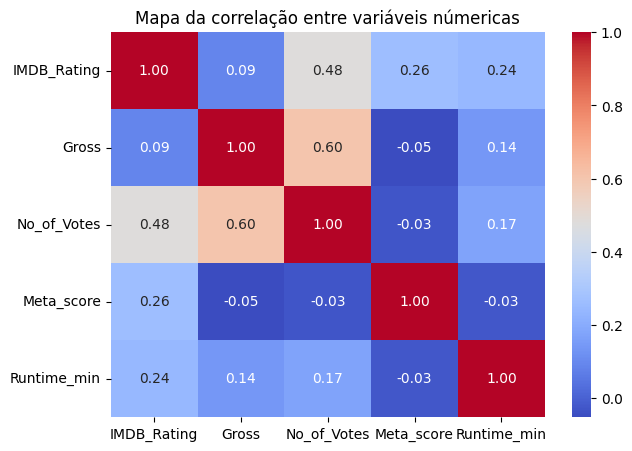

In [30]:
# Correlação entre variáveis numéricas
num_cols = ["IMDB_Rating", "Gross", "No_of_Votes", "Meta_score", "Runtime_min"]
corr = df_eda[num_cols].corr()

print(corr)
print()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa da correlação entre variáveis númericas")
plt.show()

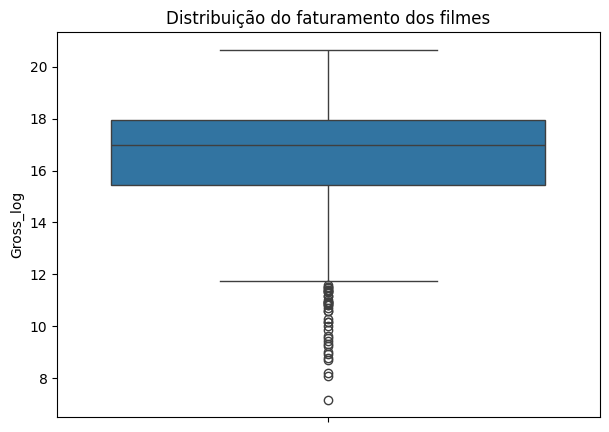

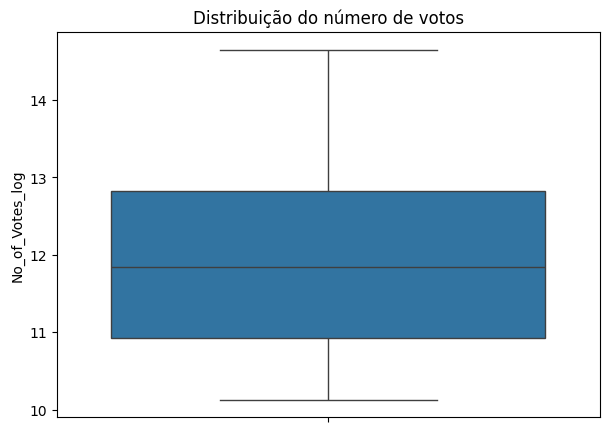

In [31]:
plt.figure(figsize=(7,5))
sns.boxplot(y=df_eda['Gross_log'])
plt.title("Distribuição do faturamento dos filmes")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(y=df_eda['No_of_Votes_log'])
plt.title("Distribuição do número de votos")
plt.show()

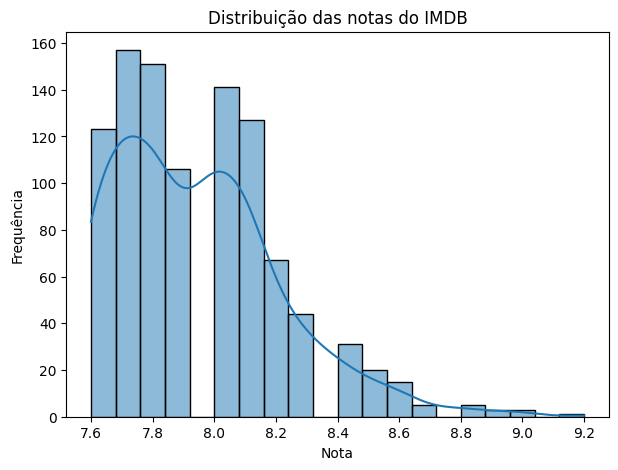

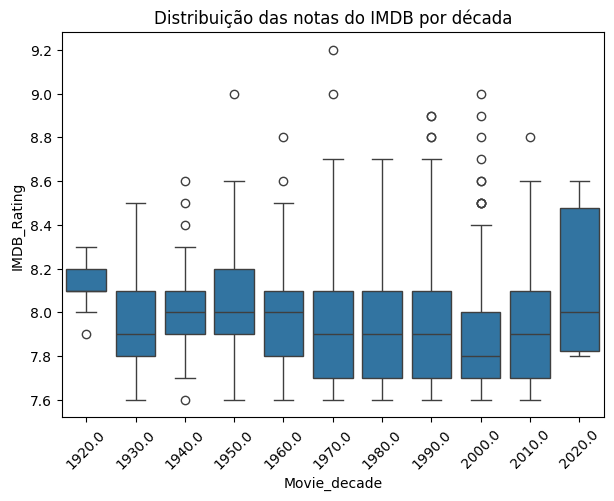

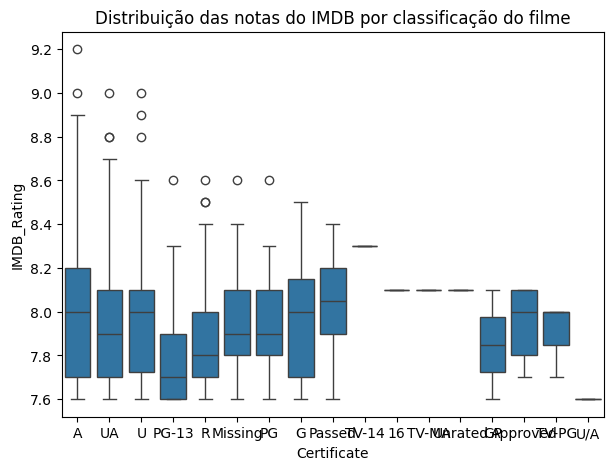

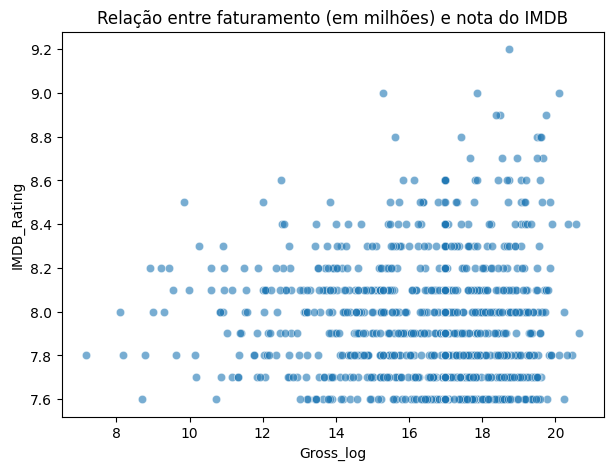

In [32]:
#  Análise do IMDB_Rating com outras categorias
plt.figure(figsize=(7,5))
sns.histplot(df_eda['IMDB_Rating'], bins=20, kde=True)
plt.title("Distribuição das notas do IMDB")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x="Movie_decade", y='IMDB_Rating', data=df_eda)
plt.title("Distribuição das notas do IMDB por década")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x="Certificate", y="IMDB_Rating", data=df_eda)
plt.title("Distribuição das notas do IMDB por classificação do filme")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x=df_eda['Gross_log'], y=df_eda['IMDB_Rating'], alpha=0.6)
plt.title("Relação entre faturamento (em milhões) e nota do IMDB")
plt.show()


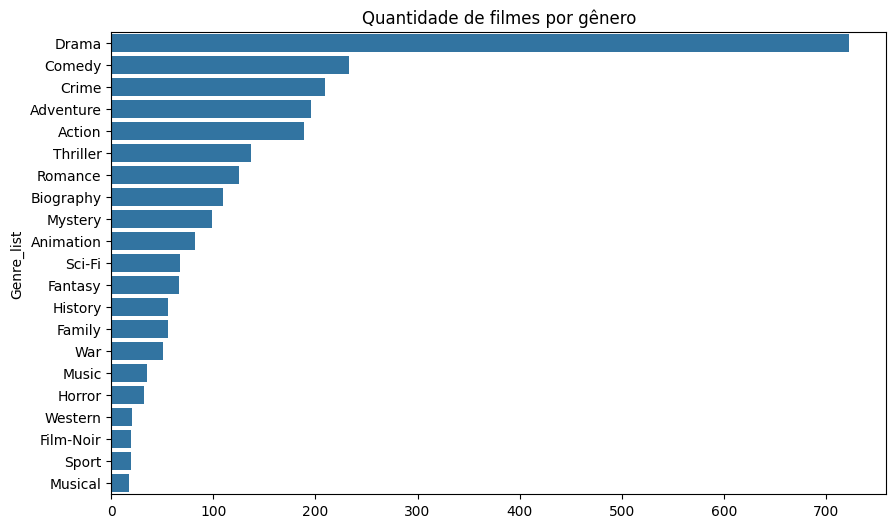

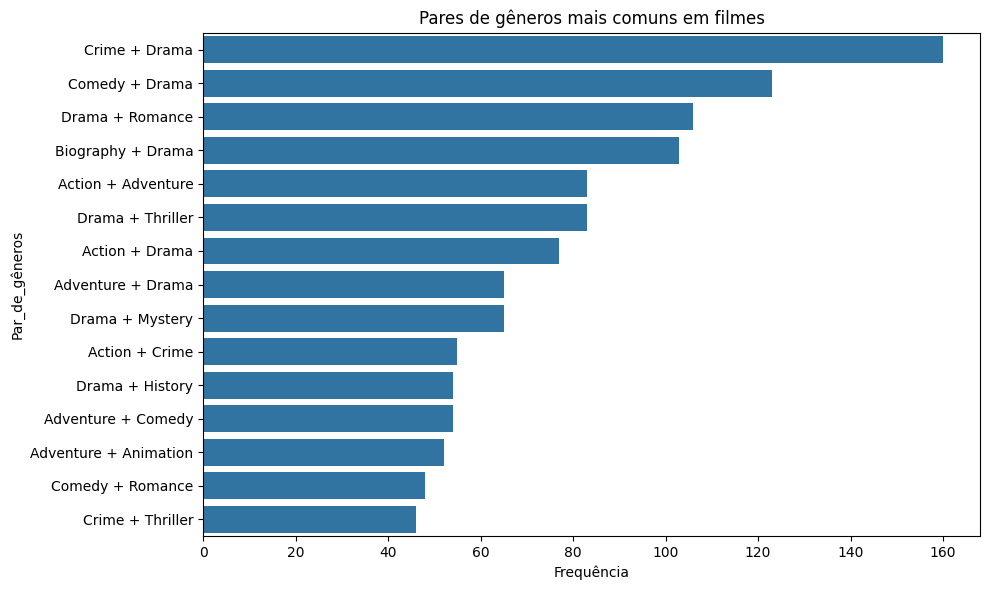

In [33]:
from itertools import combinations
from collections import Counter

# Análise de Gêneros

df_eda = df_eda.copy()
df_eda['Genre'] = df_eda['Genre'].fillna('').astype(str)
df_eda['Genre_list'] = df_eda['Genre'].str.split(',').apply(lambda xs: [g.strip() for g in xs if g.strip()!=''])
genre_count = df_eda['Genre_list'].explode().value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_count.values, y=genre_count.index)
plt.title("Quantidade de filmes por gênero")
plt.show()

pairs = []
for genres in df_eda['Genre_list']:
    if len(genres) > 1:
        pairs.extend(combinations(sorted(genres), 2))

pair_count = Counter(pairs)

pair_df = (
    pd.DataFrame(pair_count.most_common(), columns=["pair_tuple", "Frequência"])
      .assign(Par_de_gêneros=lambda d: d['pair_tuple'].apply(lambda t: f"{t[0]} + {t[1]}"))
      .drop(columns='pair_tuple')
      .head(15)
)

plt.figure(figsize=(10,6))
sns.barplot(x="Frequência", y="Par_de_gêneros", data=pair_df)
plt.title("Pares de gêneros mais comuns em filmes")
plt.tight_layout()
plt.show()

In [34]:
n_filmes = len(df_eda)
genre_mentions = df_eda['Genre_list'].explode().value_counts()
genre_by_film = (df_eda.explode('Genre_list')
                 .drop_duplicates(subset=['Series_Title','Genre_list'])
                 ['Genre_list'].value_counts())

participacao_mencoes = (genre_mentions / genre_mentions.sum()).rename("part_mencoes")
participacao_filmes  = (genre_by_film / n_filmes).rename("part_por_filme")

comparativo = pd.concat([genre_mentions.rename("mencoes"),
                         genre_by_film.rename("filmes_unicos"),
                         participacao_mencoes,
                         participacao_filmes], axis=1).fillna(0)

print(comparativo.head(10))

            mencoes  filmes_unicos  part_mencoes  part_por_filme
Genre_list                                                      
Drama           723            722          0.28            0.72
Comedy          233            233          0.09            0.23
Crime           209            208          0.08            0.21
Adventure       196            196          0.08            0.20
Action          189            189          0.07            0.19
Thriller        137            137          0.05            0.14
Romance         125            125          0.05            0.13
Biography       109            109          0.04            0.11
Mystery          99             99          0.04            0.10
Animation        82             82          0.03            0.08


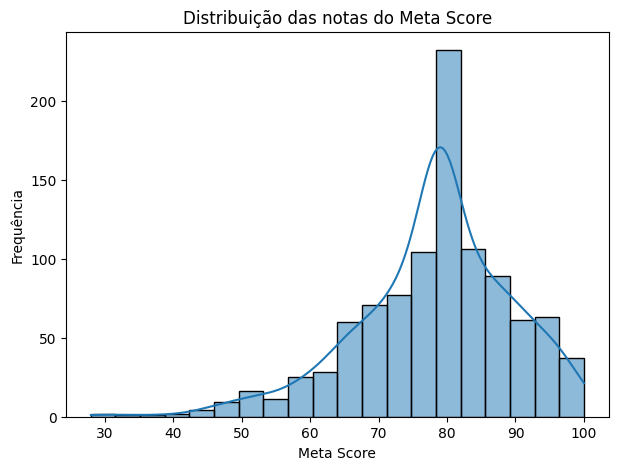

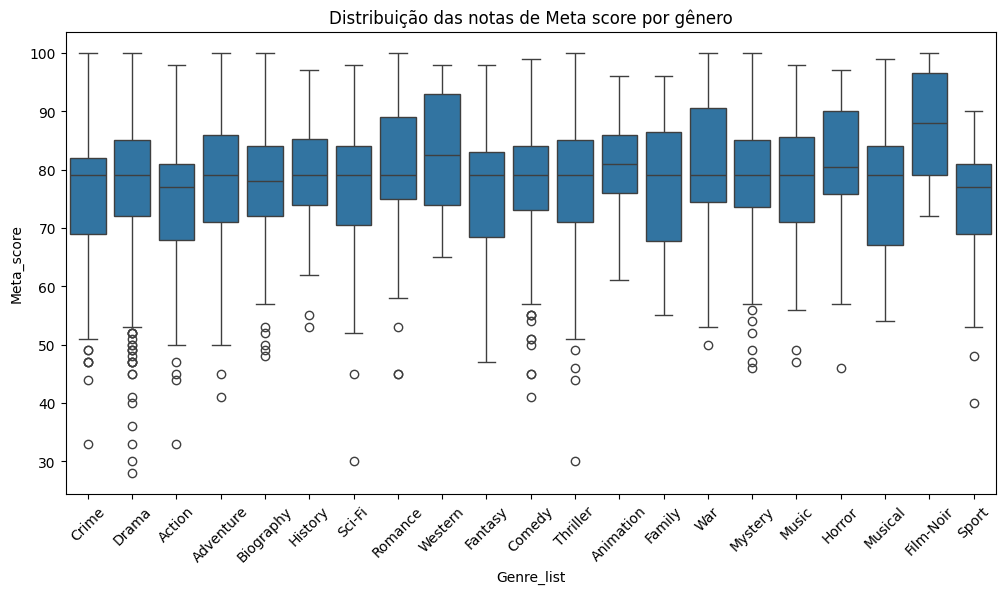

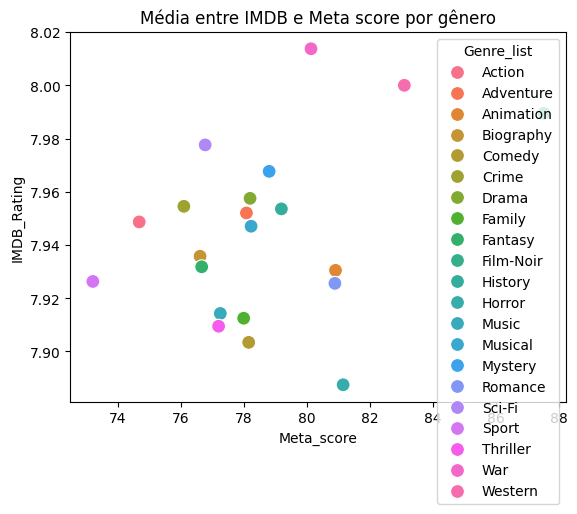

In [35]:
# Análise do Meta_score

plt.figure(figsize=(7,5))
sns.histplot(df_eda['Meta_score'], bins=20, kde=True)
plt.title("Distribuição das notas do Meta Score")
plt.xlabel("Meta Score")
plt.ylabel("Frequência")
plt.show()

# Relacionado com o genêro
df_eda = df_eda.explode('Genre_list')
meta_by_genre = df_eda.groupby('Genre_list')['Meta_score'].agg(['mean', 'median', 'std', 'count']).sort_values('mean', ascending=False)

plt.figure(figsize=(12,6))
sns.boxplot(x='Genre_list', y='Meta_score', data=df_eda)
plt.xticks(rotation=45)
plt.title("Distribuição das notas de Meta score por gênero")
plt.show()

# Relacionando com IMDB
genre_meta_imdb = df_eda.groupby("Genre_list")[['IMDB_Rating', 'Meta_score']].mean()
sns.scatterplot(x='Meta_score', y="IMDB_Rating", hue=genre_meta_imdb.index, data=genre_meta_imdb, s=100)
plt.title("Média entre IMDB e Meta score por gênero")
plt.show()

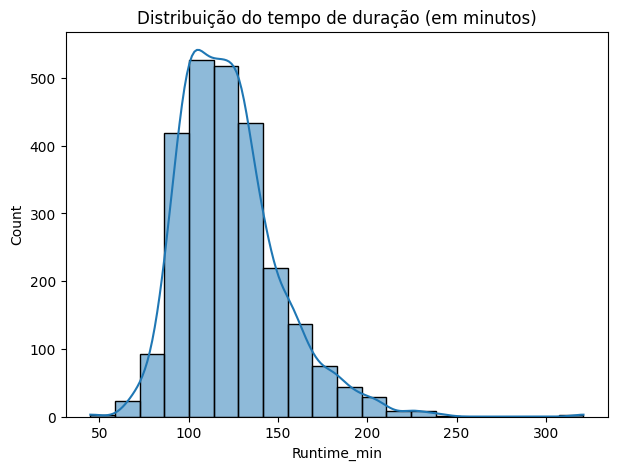

In [36]:
# Análise do tempo dos filmes
df_eda['Runtime_min'] = df_eda['Runtime'].str.extract(r'(\d+)').astype(float)
plt.figure(figsize=(7,5))
sns.histplot(df_eda['Runtime_min'], bins=20, kde=True)
plt.title("Distribuição do tempo de duração (em minutos)")
plt.show()

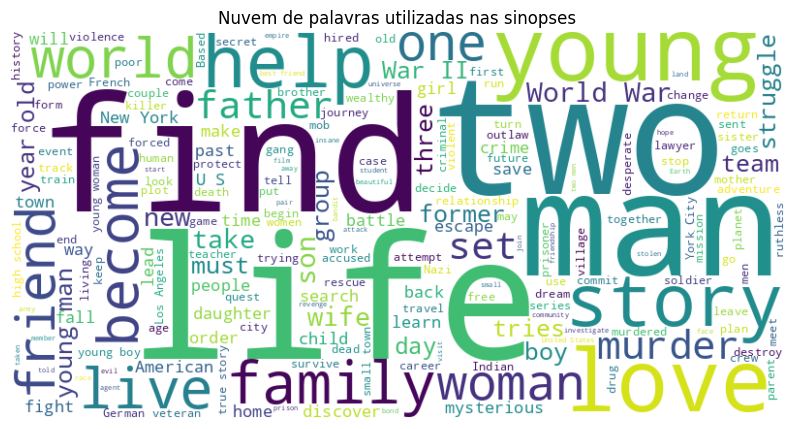

Registros originais: 2540 Registros únicos por título: 998


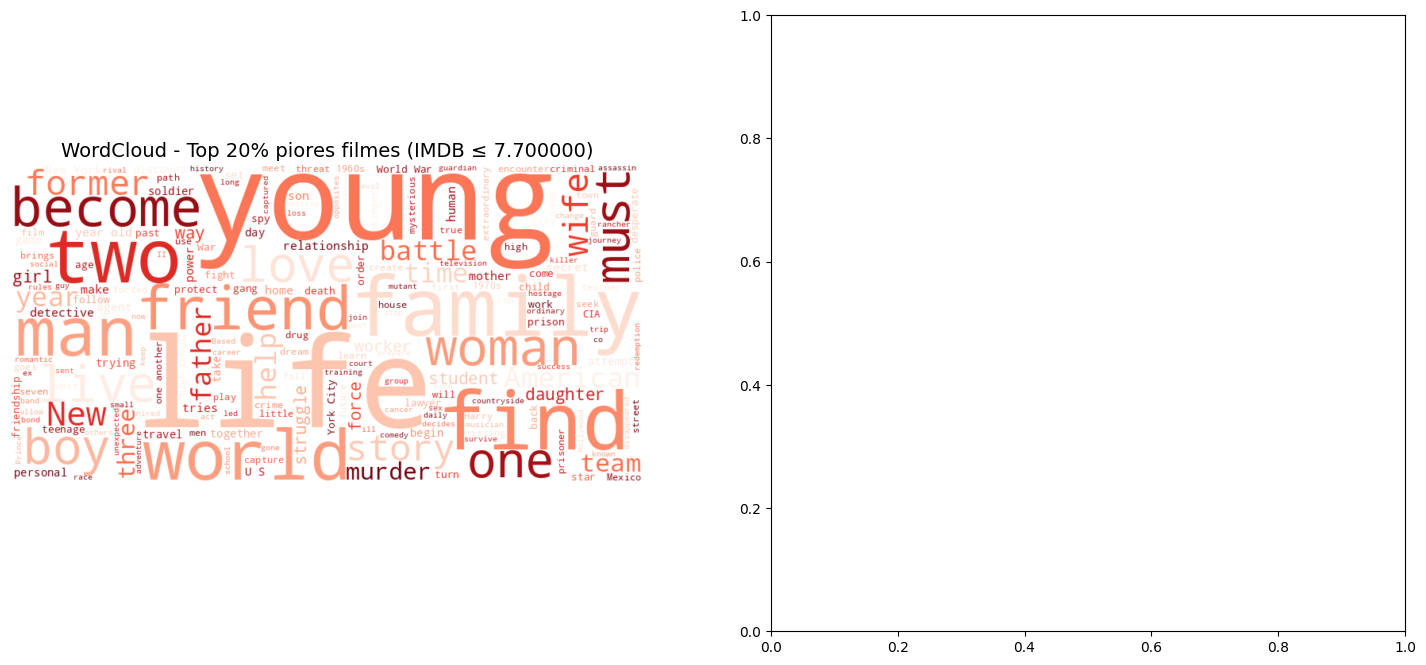

In [37]:
# WordCloud das sinopses
from wordcloud import WordCloud

movie_text = " ".join(overview for overview in df_eda['Overview'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de palavras utilizadas nas sinopses")
plt.show()

movies_unique = df_eda.drop_duplicates(subset='Series_Title').reset_index(drop=True)
print("Registros originais:", len(df_eda), "Registros únicos por título:", len(movies_unique))
movies_unique['Percent_rank'] = movies_unique['IMDB_Rating'].rank(method='first', pct=True)

# Cálculo de percentis para verificação de valores
p20 = movies_unique['IMDB_Rating'].quantile(0.2)
p80 = movies_unique['IMDB_Rating'].quantile(0.8)

low_movies = movies_unique[movies_unique['Percent_rank'] <= 0.2]
high_movies = movies_unique[movies_unique['Percent_rank'] >= 0.8]

low_text = " ".join(low_movies['Overview'].astype(str))
high_text = " ".join(high_movies['Overview'].astype(str))

low_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(low_text)
high_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(high_text)

fig, axes = plt.subplots(1, 2, figsize=(18,8))

axes[0].imshow(low_wc, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title(f"WordCloud - Top 20% piores filmes (IMDB ≤ {p20:2f})", fontsize=14)

plt.show()

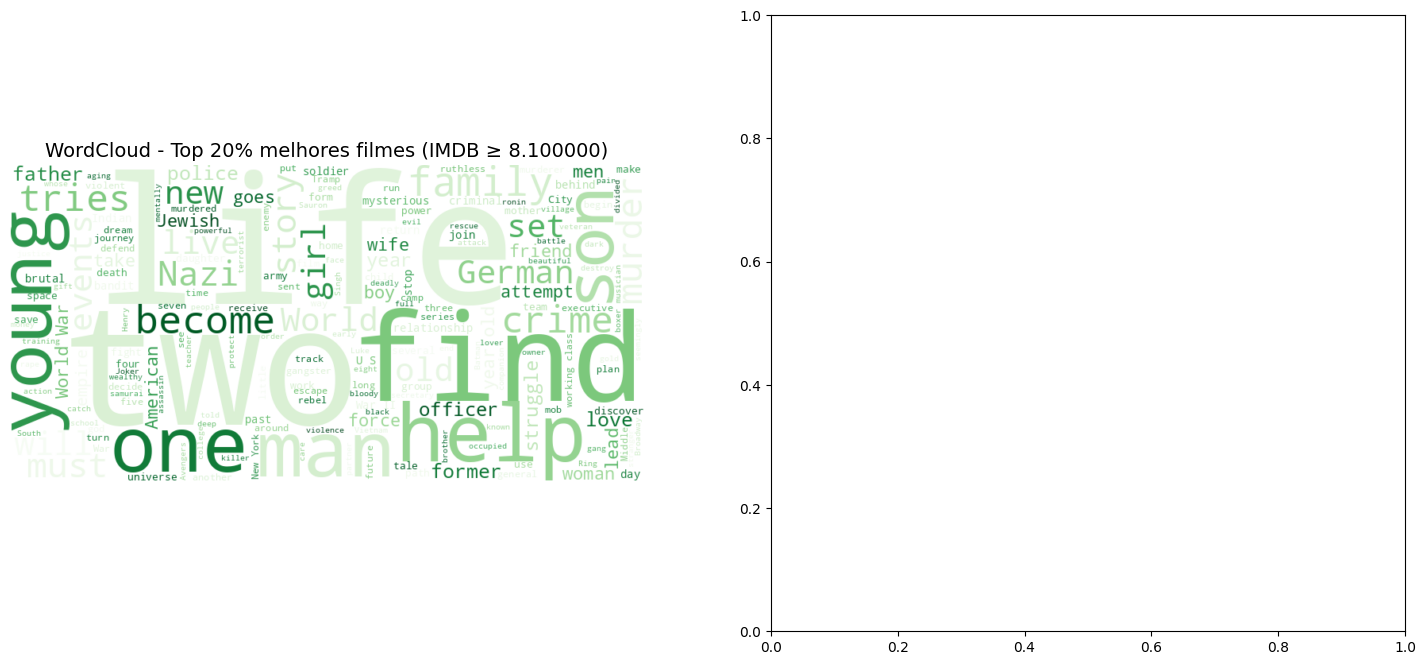

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(18,8))
axes[0].imshow(high_wc, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title(f"WordCloud - Top 20% melhores filmes (IMDB ≥ {p80:2f})", fontsize=14)
plt.show()

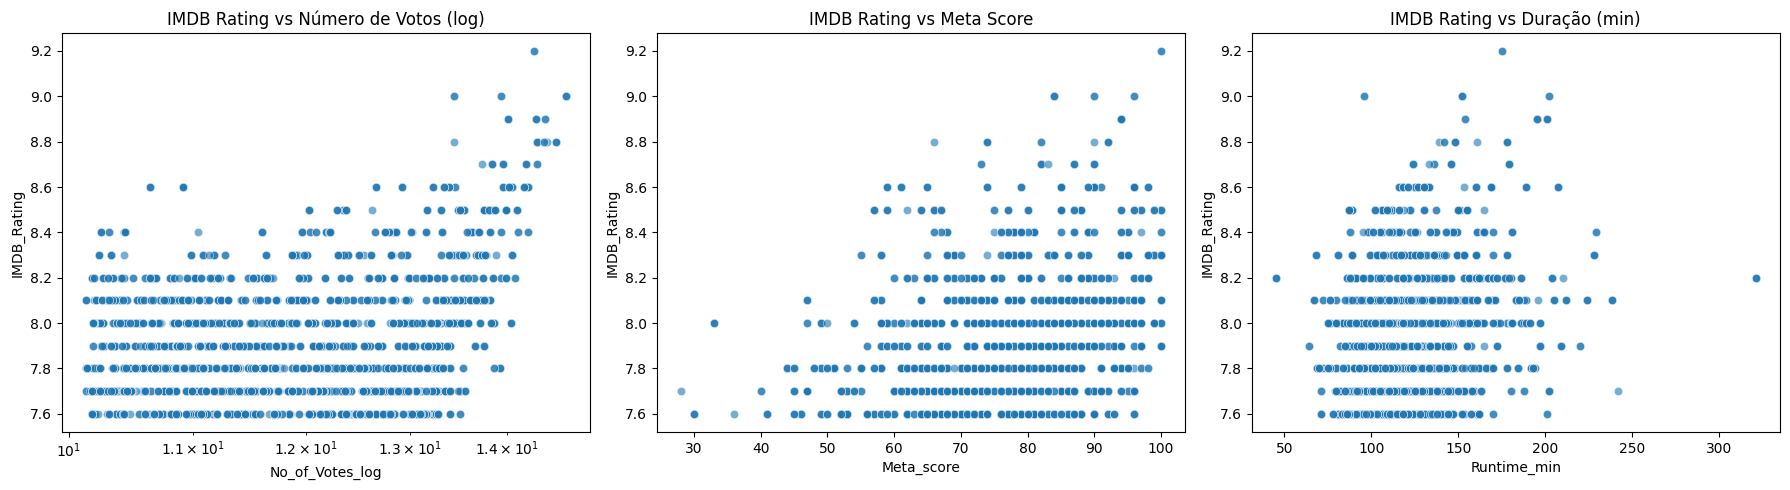

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18,5))

# IMDB_Rating x No_of_Votes (escala log nos votos)
sns.scatterplot(x="No_of_Votes_log", y="IMDB_Rating", data=df_eda, alpha=0.6, ax=axes[0])
axes[0].set_xscale("log")
axes[0].set_title("IMDB Rating vs Número de Votos (log)")

# IMDB_Rating x Meta_score
sns.scatterplot(x="Meta_score", y="IMDB_Rating", data=df_eda, alpha=0.6, ax=axes[1])
axes[1].set_title("IMDB Rating vs Meta Score")

# IMDB_Rating x Runtime_min
sns.scatterplot(x="Runtime_min", y="IMDB_Rating", data=df_eda, alpha=0.6, ax=axes[2])
axes[2].set_title("IMDB Rating vs Duração (min)")

plt.tight_layout()
plt.show()


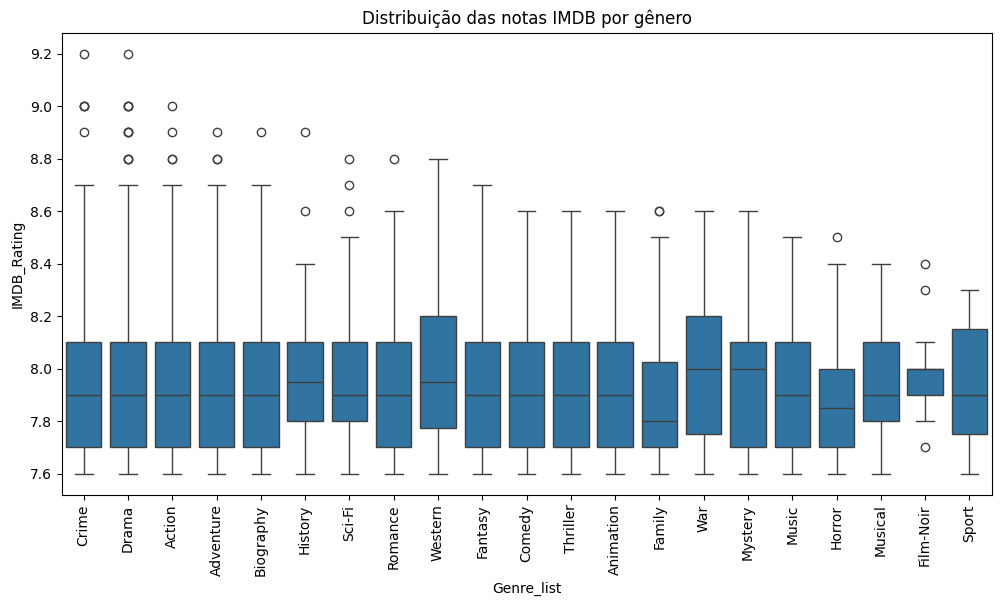

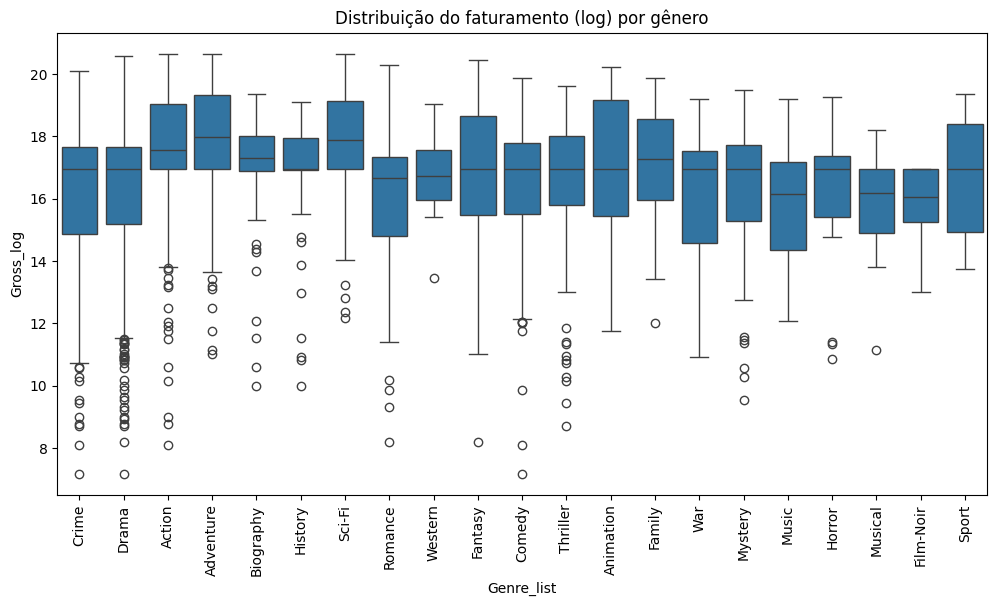

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Genre_list", y="IMDB_Rating", data=df_eda)
plt.xticks(rotation=90)
plt.title("Distribuição das notas IMDB por gênero")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="Genre_list", y="Gross_log", data=df_eda)
plt.xticks(rotation=90)
plt.title("Distribuição do faturamento (log) por gênero")
plt.show()


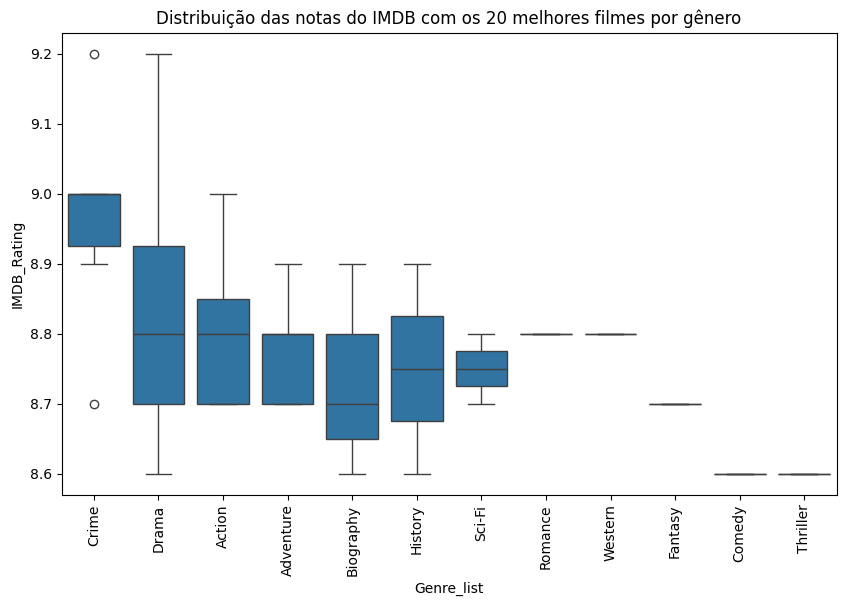

/tmp/ipython-input-2583065090.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts_top20_movies.values, y=genre_counts_top20_movies.index, palette='viridis')


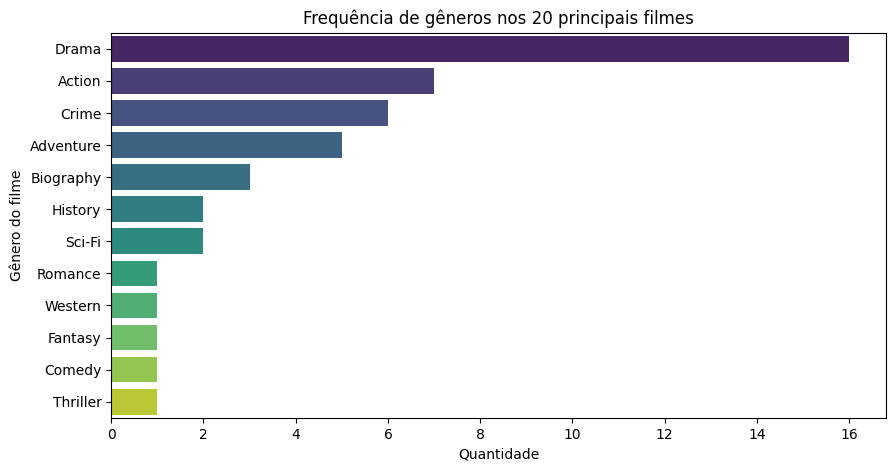

In [42]:
# Análise dos principais filmes de maneira única

df_movies_unique = df_eda.drop_duplicates(subset="Series_Title").copy()
df_movies_unique['Genre_list'] = df_movies_unique['Genre'].astype(str).str.split(', ')
top20_movies = df_movies_unique.nlargest(20, "IMDB_Rating")
top20_exploded = top20_movies.explode("Genre_list")

plt.figure(figsize=(10,6))
sns.boxplot(x="Genre_list", y="IMDB_Rating", data=top20_exploded)
plt.xticks(rotation=90)
plt.title("Distribuição das notas do IMDB com os 20 melhores filmes por gênero")
plt.show()

genre_counts_top20_movies = top20_exploded['Genre_list'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts_top20_movies.values, y=genre_counts_top20_movies.index, palette='viridis')
plt.title("Frequência de gêneros nos 20 principais filmes")
plt.xlabel("Quantidade")
plt.ylabel("Gênero do filme")
plt.show()

In [44]:
valor_imdb = 0.5
valor_meta = 0.5
q_voto = 0.90

for col in ["IMDB_Rating", "Meta_score", "No_of_Votes"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["Meta_norm10"] = df["Meta_score"] / 10.0
df["Meta_norm10"] = df["Meta_norm10"].fillna(df["IMDB_Rating"])
df["Nota_mista"] = (valor_imdb * df["IMDB_Rating"].fillna(0)) + (valor_meta * df["Meta_norm10"].fillna(0))

m = df["No_of_Votes"].quantile(q_voto)
C = df["Nota_mista"].mean()
qualified = df[df["No_of_Votes"] >= m].copy()

qualified["Media_ponderada"] = (
    (qualified["No_of_Votes"] / (qualified["No_of_Votes"] + m)) * qualified["Nota_mista"] +
    (m / (qualified["No_of_Votes"] + m)) * C
)

top10 = (qualified
         .sort_values("Media_ponderada", ascending=False)
         .loc[:, ["Series_Title", "Released_Year", "IMDB_Rating", "Meta_score", "No_of_Votes", "Nota_mista", "Media_ponderada"]]
         .head(10))

print("Top 10 (IMDB + Meta_score + votos do público):")
print(top10.to_string(index=False))

best = top10.iloc[0]
print("\nMelhor filme:")
print(best)


Top 10 (IMDB + Meta_score + votos do público):
                                     Series_Title Released_Year  IMDB_Rating  Meta_score  No_of_Votes  Nota_mista  Media_ponderada
                                    The Godfather          1972         9.20      100.00   1620367.00        9.60             9.09
                                     Pulp Fiction          1994         8.90       94.00   1826188.00        9.15             8.80
    The Lord of the Rings: The Return of the King          2003         8.90       94.00   1642758.00        9.15             8.78
                                 Schindler's List          1993         8.90       94.00   1213505.00        9.15             8.69
The Lord of the Rings: The Fellowship of the Ring          2001         8.80       92.00   1661481.00        9.00             8.67
                           The Godfather: Part II          1974         9.00       90.00   1129952.00        9.00             8.58
                                    

/tmp/ipython-input-433110320.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=directors_gross.index, x=directors_gross["sum"], palette="Blues_r")


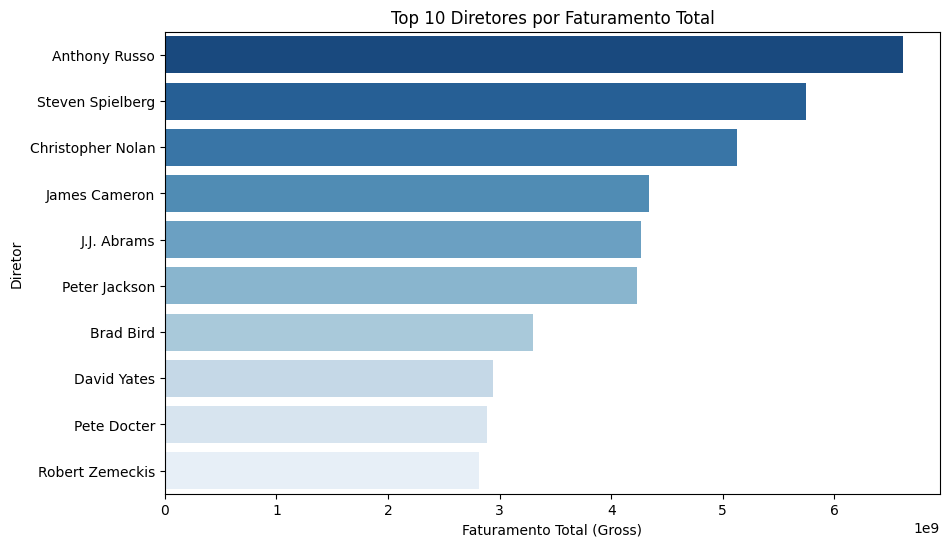

/tmp/ipython-input-433110320.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=actors_gross.index, x=actors_gross["sum"], palette="Greens_r")


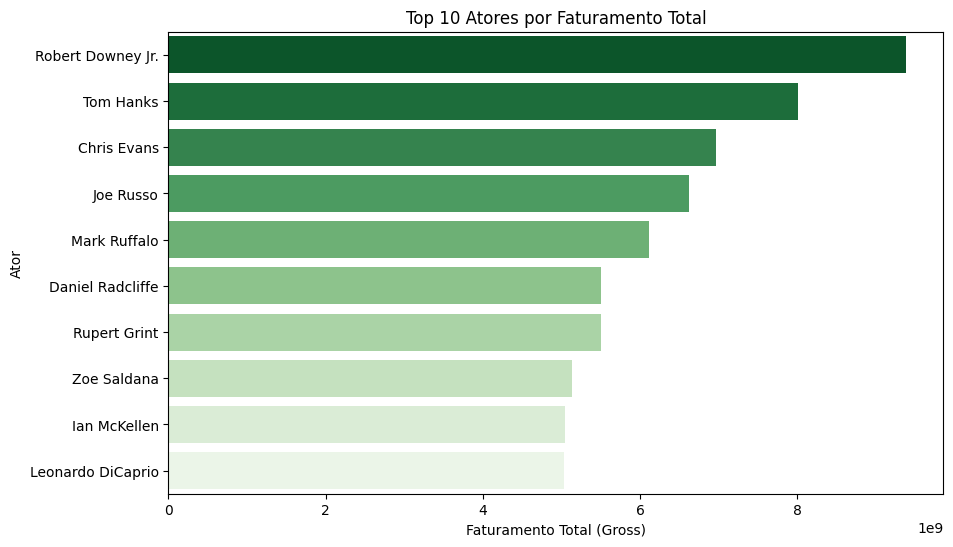

In [45]:
directors_gross = (
    df_eda.groupby("Director")["Gross"]
    .agg(["mean", "sum", "count"])
    .sort_values("sum", ascending=False)
    .head(10)
)

stars_cols = ["Star1", "Star2", "Star3", "Star4"]
stars_df = df_eda.melt(
    id_vars=["Series_Title", "Gross"],
    value_vars=stars_cols,
    var_name="Role",
    value_name="Actor"
).dropna()

actors_gross = (
    stars_df.groupby("Actor")["Gross"]
    .agg(["mean", "sum", "count"])
    .sort_values("sum", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(y=directors_gross.index, x=directors_gross["sum"], palette="Blues_r")
plt.title("Top 10 Diretores por Faturamento Total")
plt.xlabel("Faturamento Total (Gross)")
plt.ylabel("Diretor")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(y=actors_gross.index, x=actors_gross["sum"], palette="Greens_r")
plt.title("Top 10 Atores por Faturamento Total")
plt.xlabel("Faturamento Total (Gross)")
plt.ylabel("Ator")
plt.show()